<a href="https://colab.research.google.com/github/mushe/Keras_MNIST_to_onnx_Unity/blob/main/Keras_MNIST_to_onnx_Unity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ColabではKerasは既にインストールされている**

In [27]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

MNISTのデータをダウンロード

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

MNISTのデータを正規化(0～255 to 0～1.0)

In [ ]:
x_train[0]

In [ ]:
x_train[0].astype('float32') / 255.0

In [43]:
x_train[0].shape

(28, 28)

In [29]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

正解データをカテゴリカルな配列にする

例えば以下のようになる

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [32]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

モデルを記述する

良さそうなネットワークを探して適用する

convolution = 畳み込み

subsampling = プーリング

※この時、サポートされていないオペレーターを使うとコンバートできない

オペレーターリスト：https://docs.unity3d.com/Packages/com.unity.barracuda@2.0/manual/SupportedOperators.html

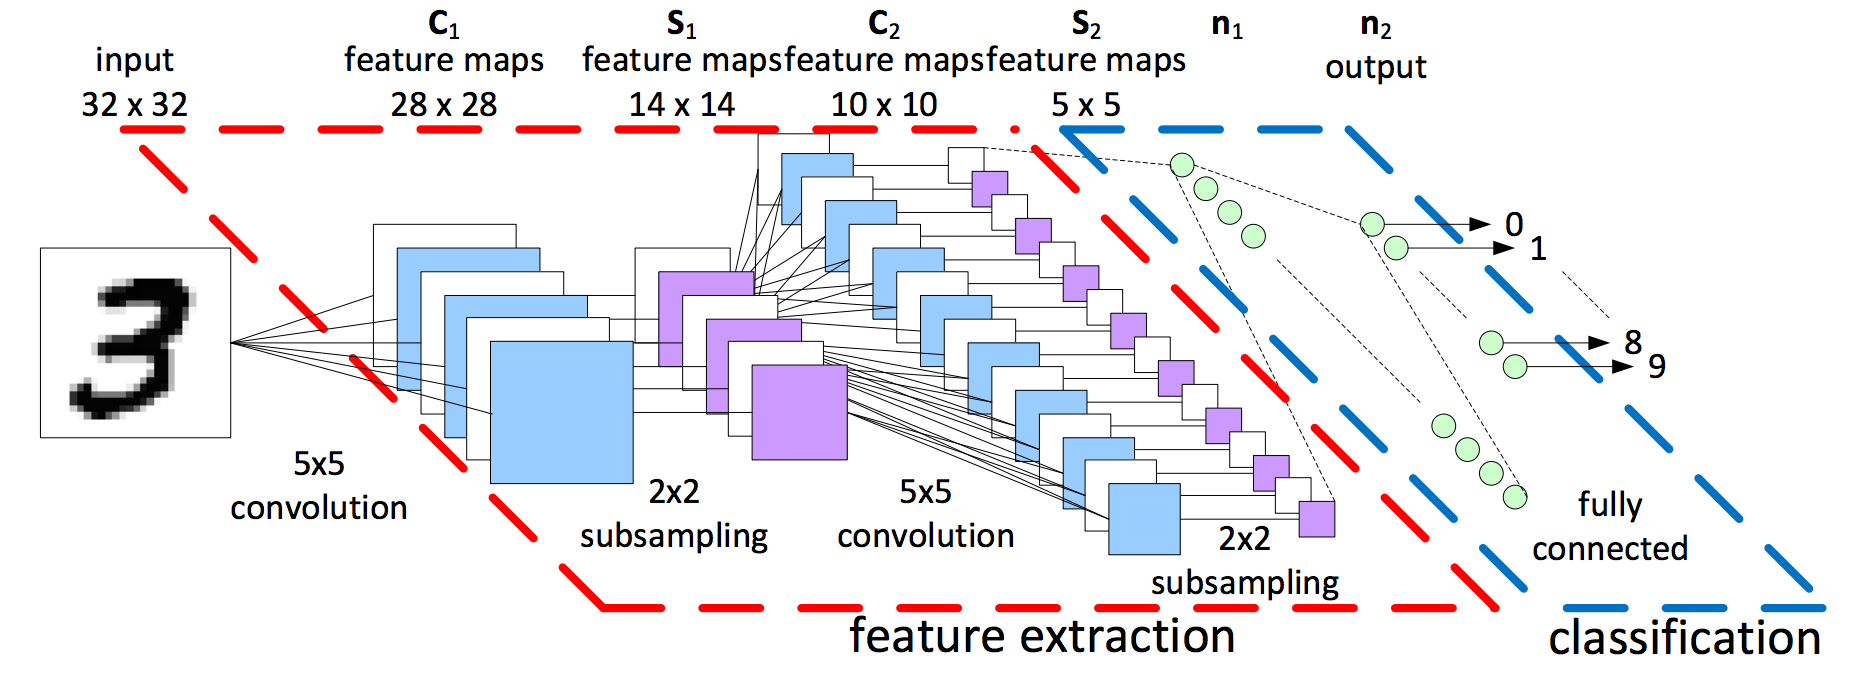

In [70]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input = Input(shape=(28,28,1))


x = Flatten()(input)

output = Dense(units=10, activation='softmax')(x)

model = Model(input, output)

作成したモデルの概要を表示

In [72]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


学習開始！

In [74]:
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


ValueError: ignored